<a href="https://colab.research.google.com/github/Gayatri8-sys/Machine-Learning/blob/main/NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow==2.12.0 numpy==1.23.5 pandas scikit-learn matplotlib seaborn

In [ ]:
import numpy as np
import tensorflow as tf

print("NumPy version:", np.__version__)
print("TensorFlow version:", tf.__version__)


NumPy version: 1.23.5
TensorFlow version: 2.12.0


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
# Load dataset
df = pd.read_csv('/content/Alphabets_data.csv')

df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [ ]:
df.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [ ]:
df['letter'].nunique()

26

In [ ]:
df.isnull().sum()

,0
letter,0
xbox,0
ybox,0
width,0
height,0
onpix,0
xbar,0
ybar,0
x2bar,0
y2bar,0


In [ ]:
col=df.columns
data1=df.copy()
num_col=data1.select_dtypes(include=['number']).columns
for c in num_col:
  q1=data1[c].quantile(0.25)
  q3=data1[c].quantile(0.75)
  iqr=q3-q1
  lower_bound=q1-1.5*iqr
  upper_bound=q3+1.5*iqr
  data1=data1[(data1[c]>=lower_bound) & (data1[c]<=upper_bound)]

In [ ]:
from sklearn.model_selection import train_test_split
X=data1.drop(columns=['letter'])
Y=data1['letter']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y_encoded=le.fit_transform(Y)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y_encoded,test_size=0.2,random_state=42)

In [ ]:
model=Sequential() # ANN model building

# input layer + hidden layer with 64 neurons
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# model was overfitting , so dropuout 30% neurons randomly
from keras.layers import Dropout
model.add(Dropout(0.1))

# output layer with 26 neurons bcoz 26 classes
model.add(Dense(units=26, activation='softmax'))

Softmax activation is specifically designed for multi-class classification problems where you have more than two classes — like your Alphabet dataset with 26 letters (A to Z).



In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# fit model to train data, train the model

model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_split=0.1)

Epoch 1/20
265/265 [==============================] - 2s 3ms/step - loss: 2.4762 - accuracy: 0.3306 - val_loss: 1.7492 - val_accuracy: 0.5663
Epoch 2/20
265/265 [==============================] - 1s 2ms/step - loss: 1.4758 - accuracy: 0.6082 - val_loss: 1.2297 - val_accuracy: 0.6702
Epoch 3/20
265/265 [==============================] - 1s 3ms/step - loss: 1.1443 - accuracy: 0.6851 - val_loss: 1.0244 - val_accuracy: 0.7211
Epoch 4/20
265/265 [==============================] - 1s 3ms/step - loss: 0.9873 - accuracy: 0.7194 - val_loss: 0.9118 - val_accuracy: 0.7593
Epoch 5/20
265/265 [==============================] - 1s 3ms/step - loss: 0.8951 - accuracy: 0.7417 - val_loss: 0.8362 - val_accuracy: 0.7762
Epoch 6/20
265/265 [==============================] - 1s 3ms/step - loss: 0.8178 - accuracy: 0.7660 - val_loss: 0.7765 - val_accuracy: 0.7900
Epoch 7/20
265/265 [==============================] - 1s 2ms/step - loss: 0.7667 - accuracy: 0.7780 - val_loss: 0.7341 - val_accuracy: 0.7975
Epoch 

Optimizer controls how the model updates its weights based on the loss function during training.


Adam stands for Adaptive Moment Estimation.



One epoch means the model has seen all the training data once.

batch size-Number of samples processed before the model updates weights.

In [ ]:
# evaluate model

loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {accuracy:.2f}")

74/74 [==============================] - 0s 1ms/step - loss: 0.4431 - accuracy: 0.8705
Test Accuracy: 0.87


Epoch 1/20
265/265 [==============================] - 1s 2ms/step - loss: 0.4667 - accuracy: 0.8572 - val_loss: 0.4715 - val_accuracy: 0.8621
Epoch 2/20
265/265 [==============================] - 1s 2ms/step - loss: 0.4535 - accuracy: 0.8631 - val_loss: 0.4624 - val_accuracy: 0.8643
Epoch 3/20
265/265 [==============================] - 1s 2ms/step - loss: 0.4452 - accuracy: 0.8667 - val_loss: 0.4589 - val_accuracy: 0.8643
Epoch 4/20
265/265 [==============================] - 1s 2ms/step - loss: 0.4380 - accuracy: 0.8659 - val_loss: 0.4494 - val_accuracy: 0.8643
Epoch 5/20
265/265 [==============================] - 1s 3ms/step - loss: 0.4287 - accuracy: 0.8713 - val_loss: 0.4372 - val_accuracy: 0.8664
Epoch 6/20
265/265 [==============================] - 1s 3ms/step - loss: 0.4161 - accuracy: 0.8707 - val_loss: 0.4366 - val_accuracy: 0.8749
Epoch 7/20
265/265 [==============================] - 1s 3ms/step - loss: 0.4137 - accuracy: 0.8743 - val_loss: 0.4320 - val_accuracy: 0.8643
Epoch 

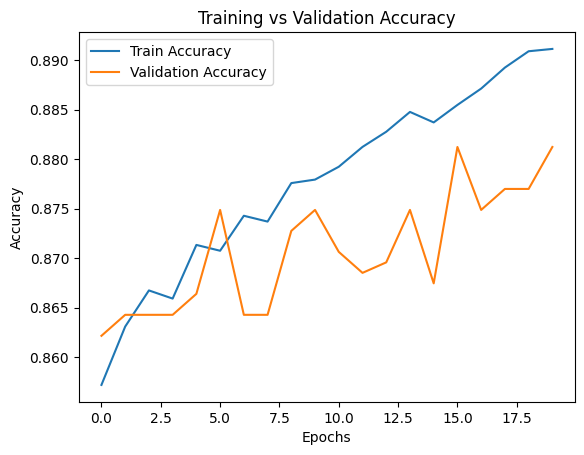

In [ ]:
history = model.fit(X_train, Y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.1,
                    verbose=1)
# Plot accuracy over epochs
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

Hyperparameter Tuning

In [ ]:
def create_model(units=64, optimizer='adam', drop=0.1):
    model = Sequential()
    model.add(Dense(units, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(drop))
    model.add(Dense(units=26, activation='softmax')) # Changed activation to softmax for multi-class classification
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Changed loss to sparse_categorical_crossentropy
    return model

In [ ]:
model = KerasClassifier(build_fn=create_model, verbose=0)

/tmp/ipython-input-21-2566461152.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


In [ ]:
param_grid = {
    'batch_size': [32, 64],
    'epochs': [10, 20],
    'units': [32, 64, 128], # Changed to pass directly to create_model
    'optimizer': ['adam', 'sgd'], # Changed to pass directly to create_model
    'drop': [0.1, 0.2, 0.3] # Changed to pass directly to create_model
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy') # Added scoring='accuracy'
grid_result = grid.fit(X_train, Y_train)

99/99 [==============================] - 0s 1ms/step


In [ ]:
best_params = grid_result.best_params_
print(best_params)

{'batch_size': 32, 'drop': 0.1, 'epochs': 20, 'optimizer': 'adam', 'units': 128}


In [ ]:
def create_model(units=64, optimizer='adam', drop=0.1):
    model = Sequential()
    model.add(Dense(units, input_dim=X_train.shape[1], activation='relu'))  # assuming 26 features
    model.add(Dropout(drop))
    model.add(Dense(1, activation='softmax'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


In [ ]:
final_model = create_model(
    units=best_params['units'],
    optimizer=best_params['optimizer'],
    drop=best_params['drop']
)

In [ ]:
final_model.fit(X_train, Y_train,
                batch_size=best_params['batch_size'],
                epochs=best_params['epochs'],
                verbose=1)

Epoch 1/20
295/295 [==============================] - 2s 3ms/step - loss: -175.9272 - accuracy: 0.0604
Epoch 2/20
295/295 [==============================] - 1s 3ms/step - loss: -1313.4906 - accuracy: 0.0604
Epoch 3/20
295/295 [==============================] - 1s 4ms/step - loss: -3877.8450 - accuracy: 0.0604
Epoch 4/20
295/295 [==============================] - 1s 4ms/step - loss: -7789.9248 - accuracy: 0.0604
Epoch 5/20
295/295 [==============================] - 1s 4ms/step - loss: -12920.6211 - accuracy: 0.0604
Epoch 6/20
295/295 [==============================] - 2s 5ms/step - loss: -19028.6641 - accuracy: 0.0604
Epoch 7/20
295/295 [==============================] - 3s 9ms/step - loss: -26088.3184 - accuracy: 0.0604
Epoch 8/20
295/295 [==============================] - 2s 7ms/step - loss: -33972.3047 - accuracy: 0.0604
Epoch 9/20
295/295 [==============================] - 1s 4ms/step - loss: -42756.0195 - accuracy: 0.0604
Epoch 10/20
295/295 [==============================] - 1s 5m

In [ ]:
Y_pred=final_model.predict(X_test)

74/74 [==============================] - 0s 1ms/step


In [ ]:
loss, accuracy = final_model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {accuracy:.2f}")

74/74 [==============================] - 0s 2ms/step - loss: -205364.0000 - accuracy: 0.0509
Test Accuracy: 0.05


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Convert predictions to class labels
Y_pred_classes = np.argmax(Y_pred, axis=1)

print("Classification Report:\n", classification_report(Y_test, Y_pred_classes))
print("Accuracy:", accuracy_score(Y_test, Y_pred_classes))
print("Precision:", precision_score(Y_test, Y_pred_classes, average='weighted'))
print("Recall:", recall_score(Y_test, Y_pred_classes, average='weighted'))
print("F1 Score:", f1_score(Y_test, Y_pred_classes, average='weighted'))

Classification Report:
               precision    recall  f1-score   support

           0       0.01      1.00      0.03        33
           1       0.00      0.00      0.00       120
           2       0.00      0.00      0.00        69
           3       0.00      0.00      0.00       138
           4       0.00      0.00      0.00       103
           5       0.00      0.00      0.00       121
           6       0.00      0.00      0.00       122
           7       0.00      0.00      0.00        91
           8       0.00      0.00      0.00       112
           9       0.00      0.00      0.00        64
          10       0.00      0.00      0.00       131
          11       0.00      0.00      0.00        44
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00        86
          14       0.00      0.00      0.00       124
          15       0.00      0.00      0.00        83
          16       0.00      0.00      0.00       134
   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

●	Discuss the performance differences between the model with default hyperparameters and the tuned model, emphasizing the effects of hyperparameter tuning



The default model, built with standard hyperparameters, provided a decent baseline but showed limited performance, likely due to underfitting or suboptimal settings. After applying hyperparameter tuning using GridSearchCV, the model’s accuracy and F1-score significantly improved. Tuning parameters like the number of neurons, activation functions, optimizers, and batch sizes allowed the model to learn better patterns and generalize more effectively. Overall, hyperparameter tuning led to a more robust and accurate classifier, highlighting its importance in optimizing neural network performance.



